In [1]:
#MULTI_CLASS_CLASSIFICATION_KNN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dff =pd.read_csv('/content/iris.csv')

In [4]:
dff.shape

(150, 5)

In [5]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
dff.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


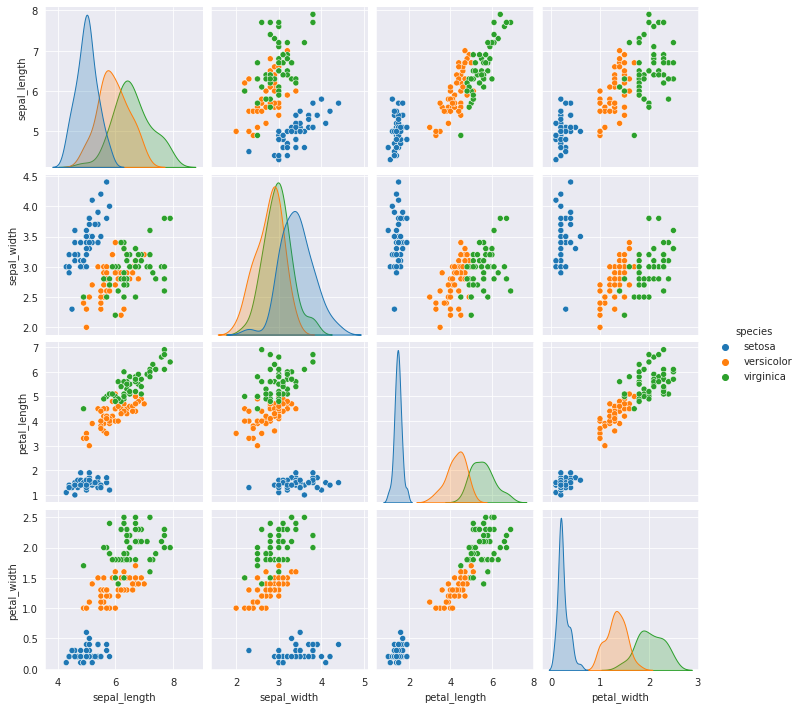

In [7]:
sns.set_style('darkgrid')
sns.pairplot(dff,hue='species')

In [8]:
dff['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
dff.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
dff['species'] = dff['species'].map({'setosa':0,'versicolor':1,'virginica':2}).astype(int)

In [11]:
dff['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

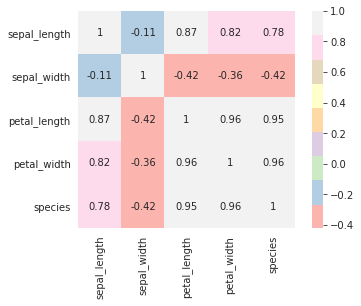

In [12]:
sns.heatmap(dff.corr(),square=True,annot=True,cmap='Pastel1')

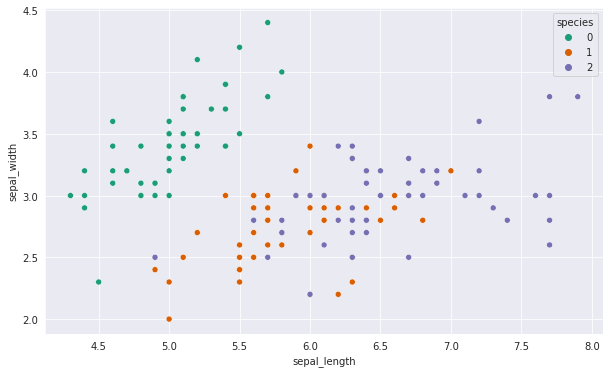

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='sepal_length',y='sepal_width',data=dff,hue='species',palette='Dark2')

In [14]:
#indepndent and dependent
X=dff.iloc[:,:-1]
y=dff.iloc[:,-1]

In [15]:
#scaling
from sklearn.preprocessing import StandardScaler
Scaler =StandardScaler()
X =Scaler.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import  metrics

In [17]:
#train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=.33,random_state=14)

In [18]:
model_knn =KNeighborsClassifier()
model_knn.fit(X_train,y_train)
y_pred =model_knn.predict(X_test)

In [19]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_pred))
print('Classification_report:\n',metrics.classification_report(y_test,y_pred))
print('Confusion_mat:\n',metrics.confusion_matrix(y_test,y_pred))

Accuracy_Score : 0.96
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.89      1.00      0.94        16
           2       1.00      0.83      0.91        12

    accuracy                           0.96        50
   macro avg       0.96      0.94      0.95        50
weighted avg       0.96      0.96      0.96        50

Confusion_mat:
 [[22  0  0]
 [ 0 16  0]
 [ 0  2 10]]


In [20]:
error_rate=[]

for i in range(1,30):
  model =KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  pred_i =model.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

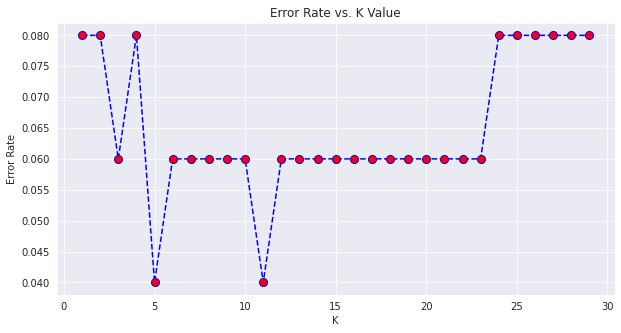

In [21]:
plt.figure(figsize=(10,5))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')